# Student t, chai sqaured, F 분포

## 스튜던트 t 분포
**fat tail**을 보이는 데이터 모형에 적합한 분포 = student t 분포 (또는 t 분포)
- 분포의 모양을 볼 때 양 끝(꼬리) 부분이 정규분포보다 두꺼운 분포 = fat tail
- 예를 들어, 주식 수익률은 보통 정규분포를 따른다고 가정
- 그러나 금융시장에서 정규분포에서 자주 발생할 수 없는 극단적인 사건들이 종종 발생
    - 금융시장에서는 이러한 현상을 블랙 스완(black swan)이라고 부름

In [24]:
import pandas_datareader.data as pdr_data
import pandas as pd
import numpy as np
#import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()

for sym in symbols:
    data[sym] = pdr_data.DataReader(sym, data_source='fred')[sym]
data = data.dropna()

## S&P500, Nasdaq, Dow-Jones, Nikkei255 주가지수 데이터
- 비교를 위해 2010년 값을 100으로 통일

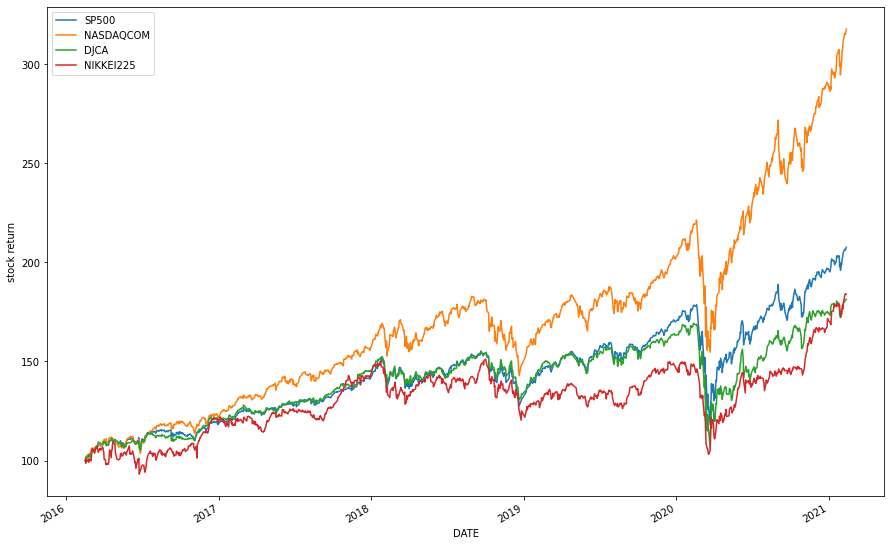

In [12]:
(data / data.iloc[0]*100).plot(figsize=(15,10))
plt.ylabel('date')
plt.ylabel('stock return')
plt.show()

## 각 지수의 일간 수익률 분포 시각화 (히스토그램)
- 대체적으로 정규분포와 유사한 형태를 나타냄

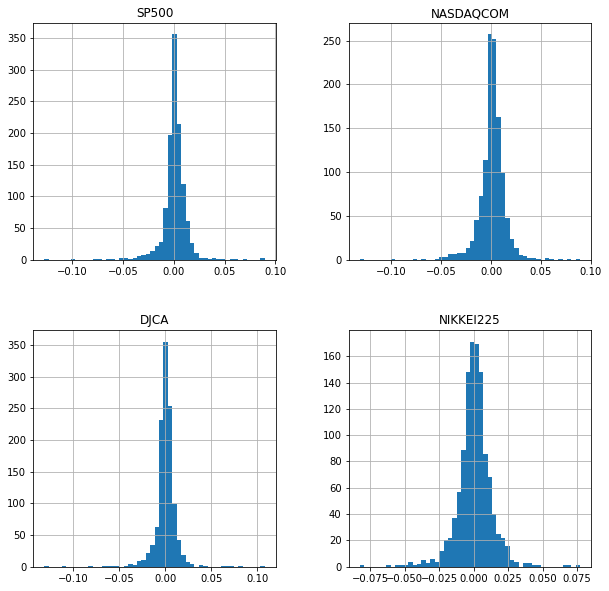

In [19]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50, figsize=(10,10))
plt.show()

## Q-Q Plot으로 정규성 확인
- 정규분포보다 더 극단적인 경우가 많이 발생하고 있음

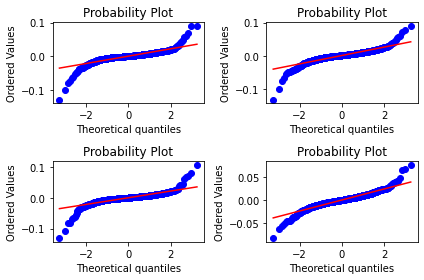

In [27]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    stats.probplot(log_returns[sym].dropna(), plot=ax)

plt.tight_layout()
plt.show()

## 스튜던트 t 분포의 확률 밀도 함수
scipy 패키지의 t 클래스 사용
- `df` : 자유도
- `loc` : 기댓값
- `scale` : 표준편차

### 자유도가 낮을수록 극값의 발생 빈도가 증가한다

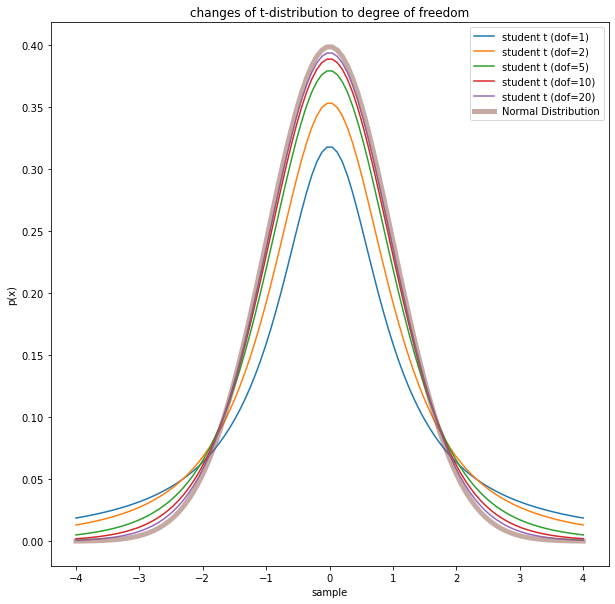

In [36]:
plt.figure(figsize=(10,10))
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=f'student t (dof={df})')

plt.plot(xx, stats.norm().pdf(xx), label="Normal Distribution", lw=5, alpha=0.5)
plt.title('changes of t-distribution to degree of freedom')
plt.xlabel('sample')
plt.ylabel('p(x)')
plt.legend()
plt.show()